# Predicting Wine Quality based on different input components

## Contents:
1. Understanding the wine data columns
2. Perform basic data check
3. Perform relation analysis by graphical approach
4. Cleaning the data/Data Transformation
5. Data preperation for Model selection for Training & Test
6. Conclusion

## 1. Understanding the wine data columns

##### 1. Fixed acidity 
Most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
##### 2. Volatile acidity
The amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
##### 3. Citric acid
Found in small quantities, citric acid can add ‘freshness’ and flavor to wines
##### 4. Residual sugar
The amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
##### 5. Chlorides 
The amount of salt in the wine
##### 6. Free sulfur dioxide
The free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisul-fite ion; it prevents microbial growth and the oxidation of wine
##### 7. Total sulfur dioxide
Amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
##### 8. Density
The density of water is close to that of water depending on the percent alcohol and sugar con-tent
##### 9. pH
Describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3–4 on the pH scale
##### 10. Sulphates
A wine additive which can contribute to sulfur dioxide gas (S02) levels, which acts as an antimicrobial and antioxidant
##### 11. Alcohol
The percent alcohol content of the wine
##### 12. Quality
Output variable (based on sensory data, score between 0 and 10)

## 2. Perform basic data check

#### Impoting all relevant Libraries that support to do Exploratory Data Analysis

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import sklearn.preprocessing as preproc
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

import statsmodels.api as sm

sns.set_style('whitegrid')

DATA_PATH = 'WineData/'
def load_Wine_data(data_path,fileName): 
    csv_path = os.path.join(data_path, fileName) 
    try:
        return pd.read_csv(csv_path, sep=';')
    except:
        print("Given File not available..Please check you entered the correct fine name...!")

#### Loding Data from CSV to DataFrame

In [2]:
WhiteWineData = load_Wine_data(DATA_PATH,'winequality-white.csv')
RedWineData = load_Wine_data(DATA_PATH,'winequality-red.csv')

#### Let’s have the view on of the data into a tabular form

In [3]:
WhiteWineData.head()# Checking first 5 data instance

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Checking if there is any missing data which require Imputation. 

In [4]:
WhiteWineData.isna().sum() # No Data missing hence no missing imputation required

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### Check for the Data Types of all feature(Checking of Numerical and Categorical feature presence)

In [5]:
WhiteWineData.dtypes # No Categorical feature present hence no Categorical encoding is required

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

#### Checking counts of rows and cloumns present in sample data(size)

In [6]:
WhiteWineData.shape #So total 4898 no. of instances present and total 12 column including the TARGET variable

(4898, 12)

In [7]:
WhiteWineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
WhiteWineData.columns # Printing all columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### Check for Target value(Quality) : Different target values with it's counts of occurance

In [9]:
WhiteWineData.quality.value_counts() ## Wine Quality value 6 exist highest and Quality 9 value occurance is lowest

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

##### Quality ranges from Lowest = 3 to Highest = 9

#### To check if there is any pattern for highest quality

In [10]:
#WhiteWineData[(WhiteWineData.quality==9) | (WhiteWineData.quality==8)]
WhiteWineData[(WhiteWineData.quality==9) ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


#### To check if there is any pattern for highest quality

In [11]:
WhiteWineData[(WhiteWineData.quality==3) ]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
251,8.5,0.260,0.21,16.20,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.50,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
445,7.1,0.320,0.32,11.00,0.038,16.0,66.0,0.99370,3.24,0.40,11.5,3
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
873,10.3,0.170,0.47,1.40,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3
1034,7.9,0.640,0.46,10.60,0.244,33.0,227.0,0.99830,2.87,0.74,9.1,3
1229,8.3,0.330,0.42,1.15,0.033,18.0,96.0,0.99110,3.20,0.32,12.4,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1484,7.5,0.320,0.24,4.60,0.053,8.0,134.0,0.99580,3.14,0.50,9.1,3


## 3. Relation analysis by graphical approach


### Correlation Matrix plots : 

#### Visualizing the data by graphs and figures. 
A pairplot provides the relationship among all the numerical columns in the dataframe

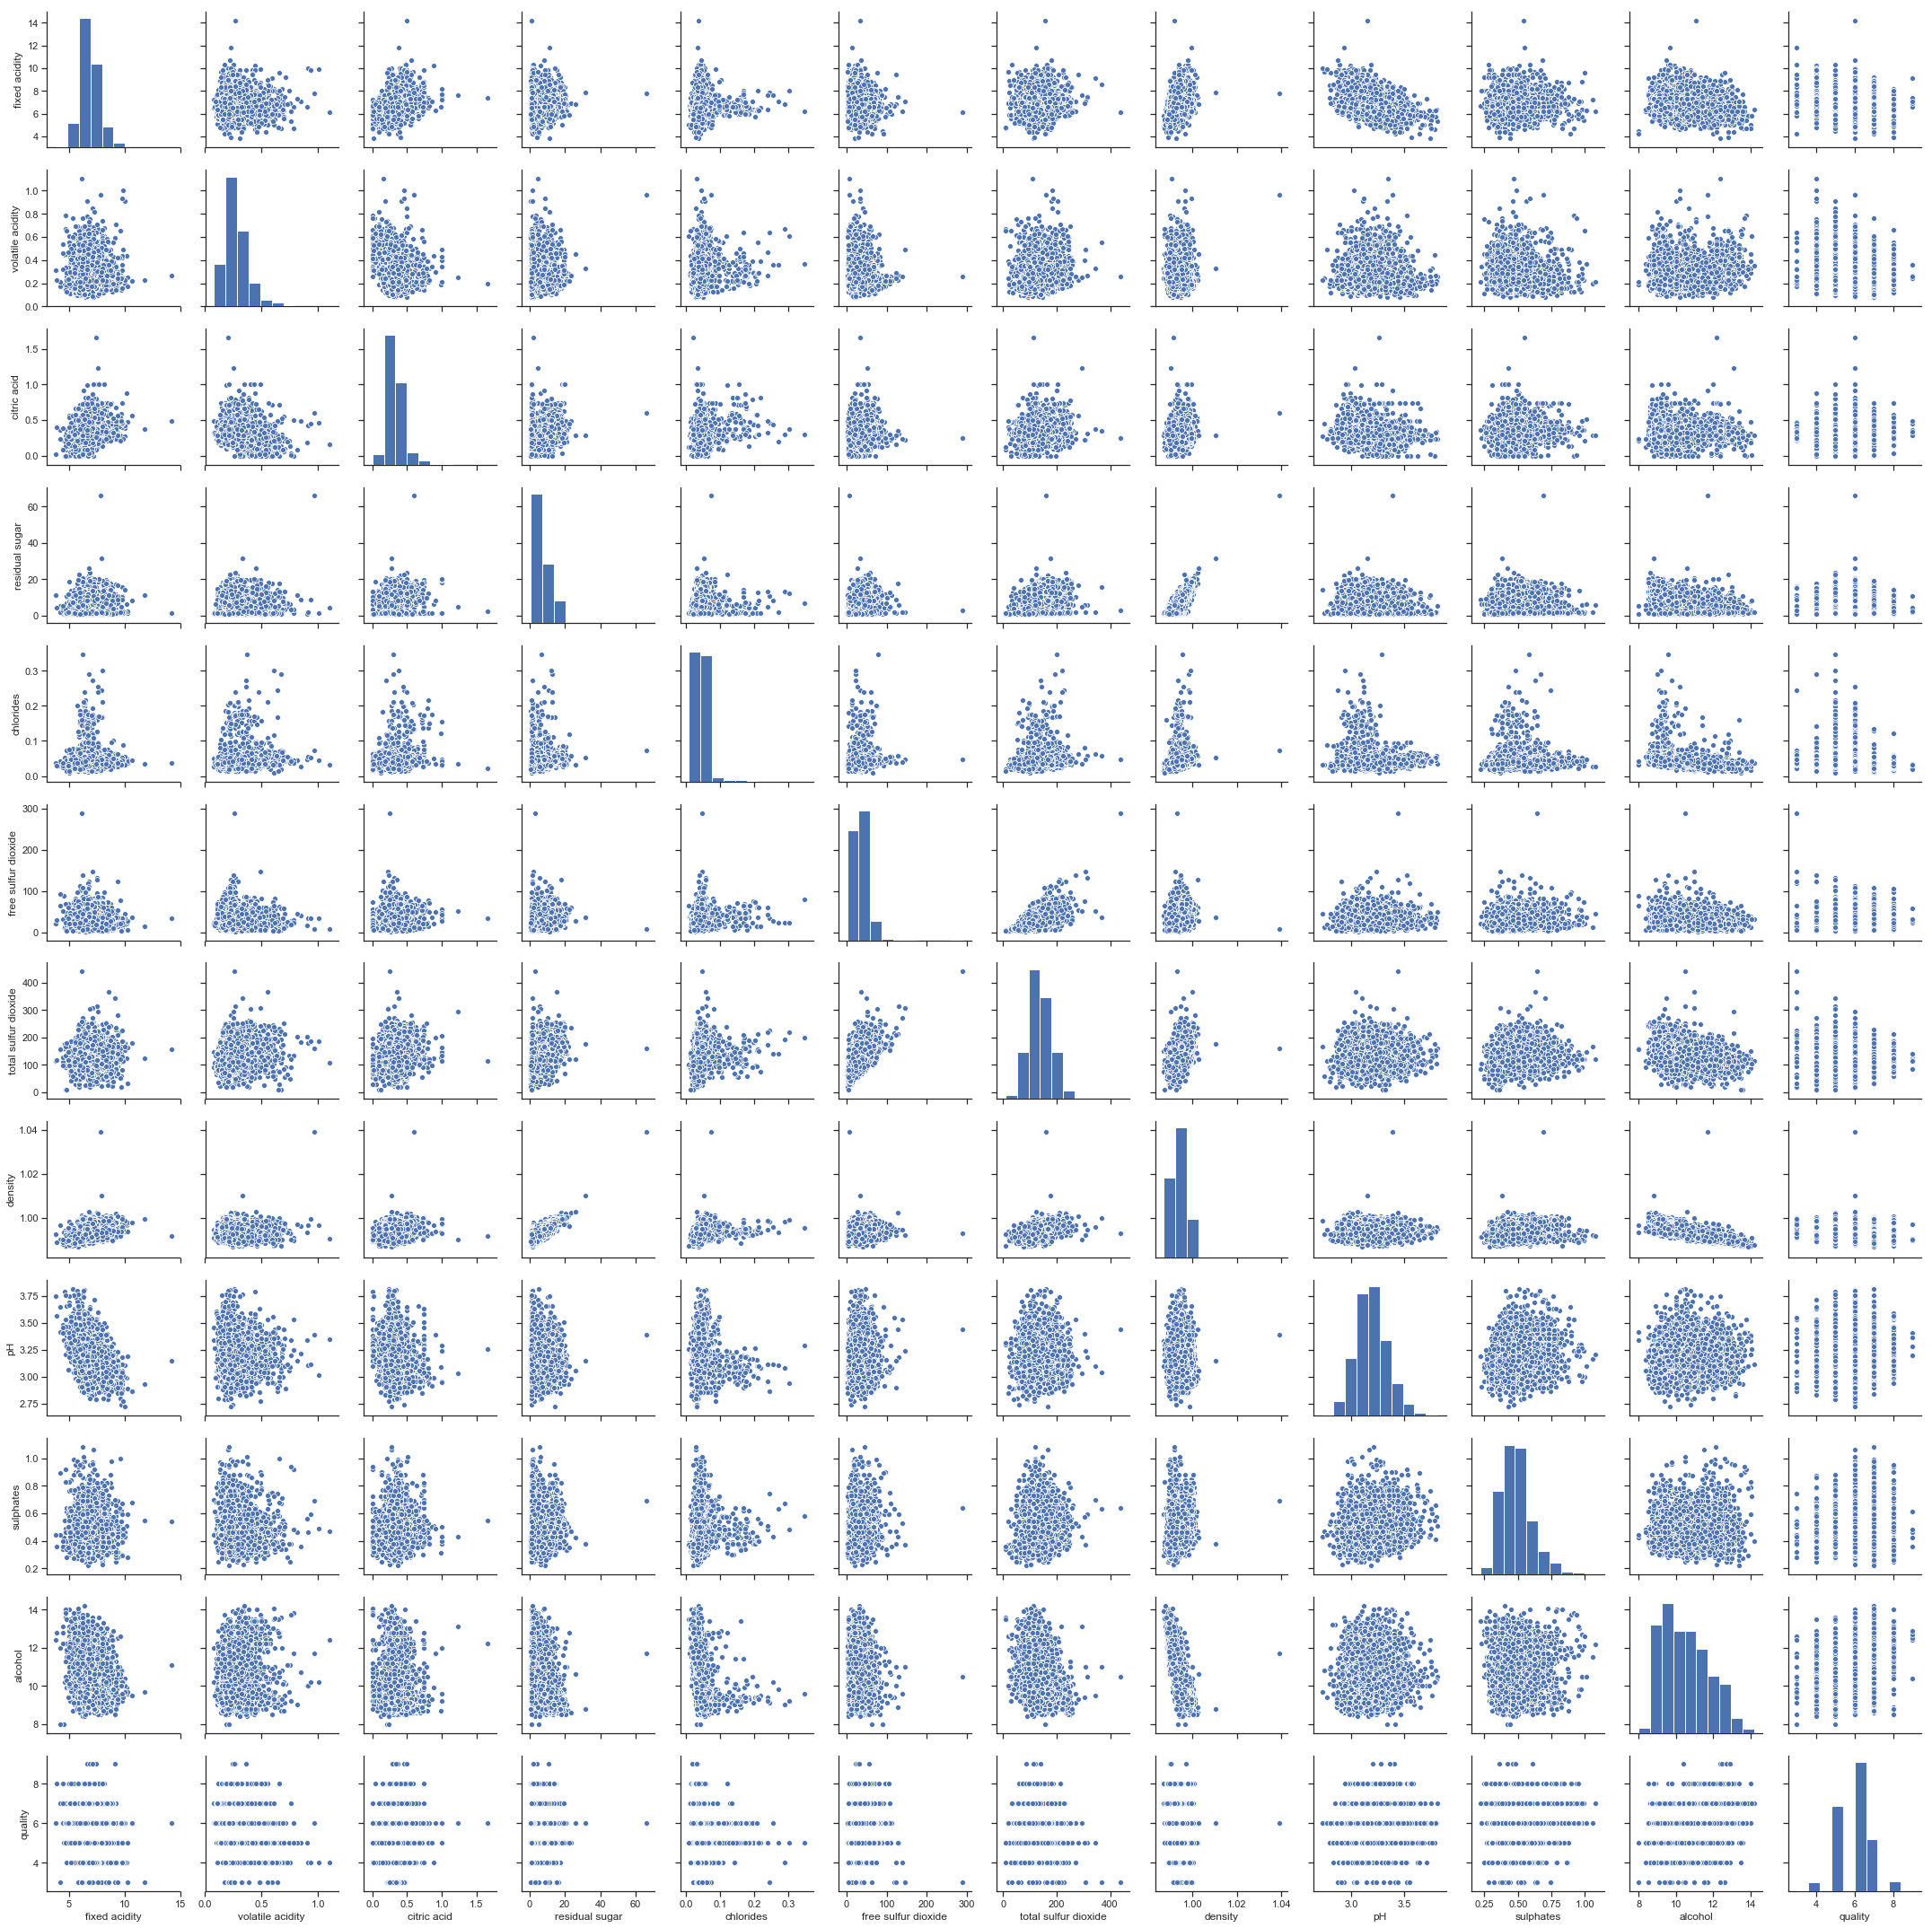

In [12]:
sns.set(style="ticks")
sns.pairplot(data=WhiteWineData)

#### Ovservation : 
Most of the data is having outliers

#### Check the strength of the correlation among the variables
A good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap

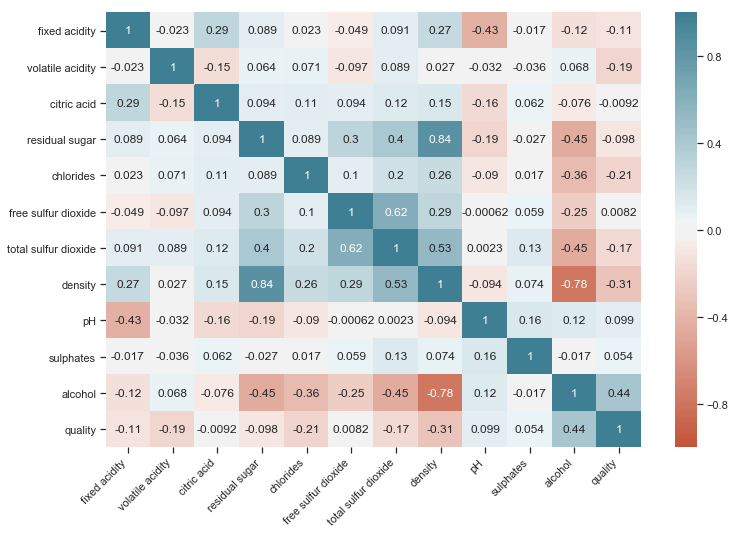

In [13]:
plt.figure(figsize=(12,8))
corr = WhiteWineData.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot=True,)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#### Plotting the relationship among the features

In [14]:
corr_matrix = WhiteWineData.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

#### Findings:
alcohol, density, chlorides, volatile acidity influence the quality of wine in order

#### Strong relations :
-------------
1. density ~ residual sugar [Positive relation (0.84)]
2. alcohol ~ density [Negative / inverse relation (-0.78)]
3. free sulfur dioxide ~ total sulfur dioxide  [Positive relation (0.62)]

#### Moderate relations :
-------------
1. density ~ total sulfur dioxide  [Positive relation (0.53)]
2. alcohol ~ residual sugar [Negative / inverse relation (-0.45)]
3. alcohol ~ total sulfur dioxide [Negative / inverse relation (-0.45)]

#### Plotting the relationship among the important features influecing the quality of wine

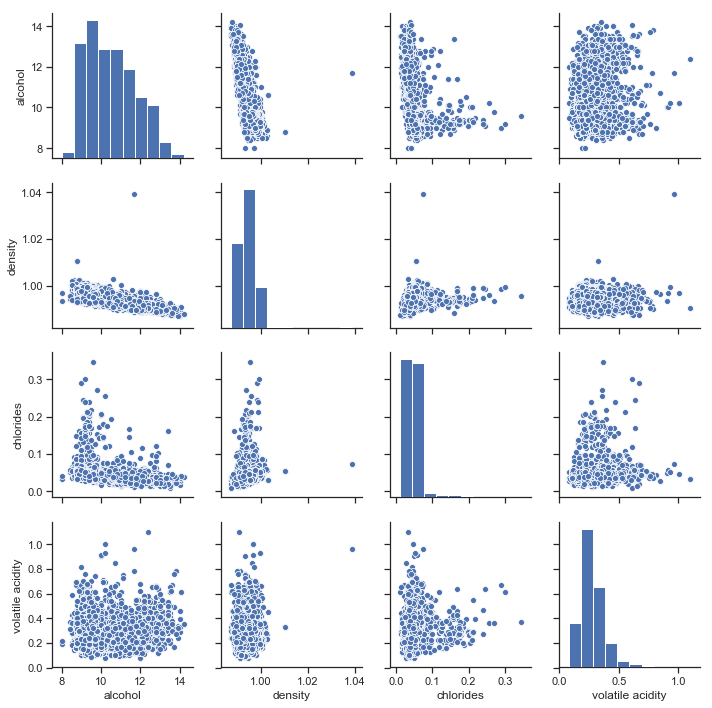

In [15]:
sns.pairplot(WhiteWineData[['alcohol','density','chlorides','volatile acidity']])


#### Rreshape the dataframe with pd.melt for preparing a facetgrid

Add our own definition of quality of wine based on quality index from the data.

In [16]:
# Very Good = [9]
# Good   = [7,8]
# Medium = [5,6]
# Poor   = [3,4]

WhiteWineData['overall'] = WhiteWineData['quality'].apply(lambda x :'Poor' if x < 5 else 'Medium' if x < 7 else 'Good' if x < 9 else 'Very Good' )
WhiteWineData.overall = WhiteWineData.overall.astype('category')

In [20]:
facet_grid_wine = pd.melt(WhiteWineData, id_vars=['quality', 'overall'], value_vars=WhiteWineData.columns[:11], var_name='variable', value_name='value')


In [21]:
facet_grid_wine.sort_values(by=['variable','quality'], ascending=[True,True], inplace=True)
facet_grid_wine.reset_index(drop=True, inplace=True)
facet_grid_wine.quality = facet_grid_df.quality.astype('str')
facet_grid_wine.quality = facet_grid_df.quality.astype('category')


NameError: name 'facet_grid_df' is not defined

#### Distribution of various variables across the wine quality : FacetGrid

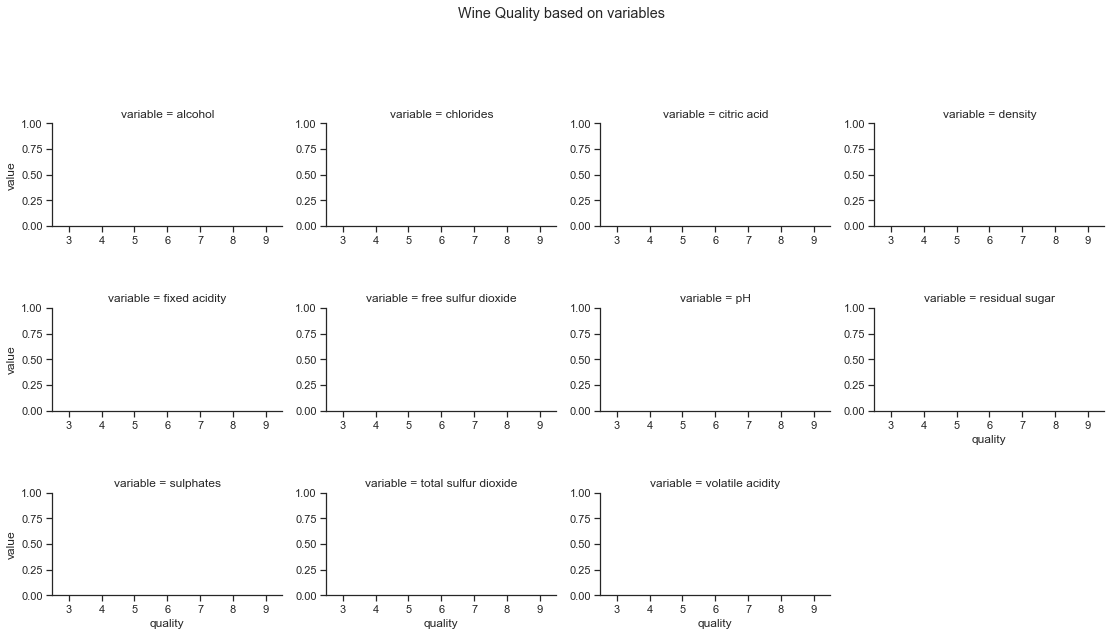

In [22]:
# FacetGrid

g = sns.FacetGrid(facet_grid_wine, col='variable', col_wrap=4, hue='overall', palette={'Poor':'#F7E3DE', 'Medium':'#E99494', 'Good':'#c74848', 'Very Good' :'#DB0000'}, 
                  sharey=False, sharex=False, height=3, aspect=1.3, legend_out=True, hue_order=['Poor','Medium','Good', 'Very Good'])
g.map(sns.violinplot, 'quality', 'value', order=['3', '4', '5', '6', '7', '8', '9'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Wine Quality based on variables')
plt.legend = ['Poor','Medium','Good', 'Very Good']
plt.show()

In [23]:
facet_grid_wine.columns

Index(['quality', 'overall', 'variable', 'value'], dtype='object')

### Column bar suggesting the variation of the quality of wine with variation of variable quantity

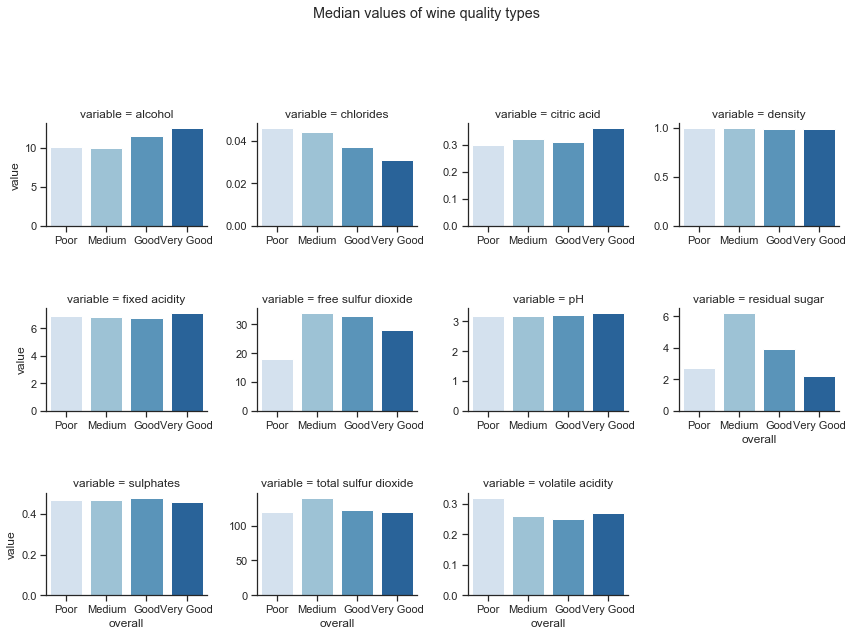

In [24]:
# Plot bar graph for the median values.

d = facet_grid_wine.groupby(['variable','overall'], as_index=False)[['value']].median()

g = sns.FacetGrid(d, col='variable', col_wrap=4, sharey=False, sharex=False, height=3, aspect=1, legend_out=True, 
                  hue='overall', hue_order=['Poor','Medium','Good', 'Very Good'],palette='Blues')
g.map(sns.barplot, 'overall', 'value', order=['Poor','Medium','Good', 'Very Good'])

g.fig.tight_layout()
plt.subplots_adjust(top=0.8, hspace=0.8)
g.fig.suptitle('Median values of wine quality types')
plt.show()

#### Conclusion

1. As alcohol level increase ==> Quality increases
2. As chlorides level decreases ==> Quality increases
3. As citric acid level increases ==> Quality increases
4. As density decreases ==> Quality increases
5. fixed acidity ==> can’t say impact on Quality
6. As free sulfur dioxide increases ==> Quality increases
7. pH ==> can’t say impact on Quality
8. As residual sugar increases ==> Quality increases, but not always
9. sulphates ==> can’t say impact on Quality
10. total sulfur dioxide ==> can’t say impact on Quality
11. As the volatile acidity decreases ==> Quality increases

#### But since, only below four contributes towards wine quality :
alcohol, density, volatile acidity, chlorides
2. Increase in the alcohol qty, increases the quality of the wine.
3. Decrease in the density of the wine, increases the quality of the wine.
4. Decrease in the volatile acidity of the wine, increases the quality of the wine.
5. Decrease in chlorides, increases the quality of the wine.

#### Checking the Skewness and kurtosis of the data

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


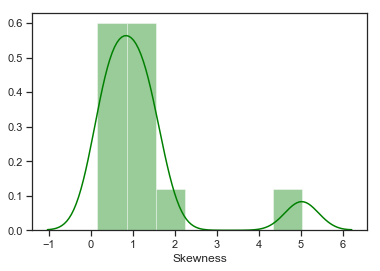

In [25]:
sns.distplot(WhiteWineData.skew(),color='green',axlabel ='Skewness')

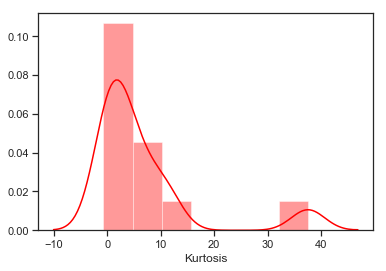

In [26]:
sns.distplot(WhiteWineData.kurtosis(),color='red',axlabel ='Kurtosis')

#### Ploting Histogram to quickly assess the distribution of each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c231c4d30>,
      dtype=object)

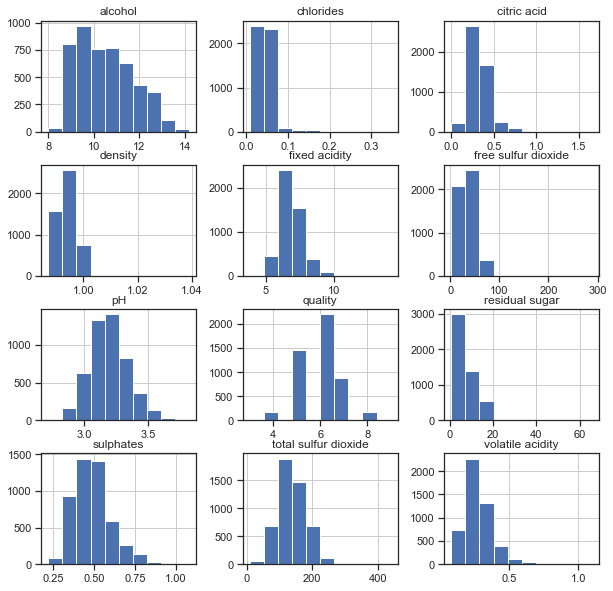

In [27]:
WhiteWineData.hist(figsize=(10,10))

#### Finding different vital statistics of different feature

In [28]:
WhiteWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


#### Conclusion

1. Scale/range of total sulfur dioxide and free sulfur dioxide is quite high compared to other features
2. alcohol is not normally distributed
3. sulphates is not normally distributed

### Finding Outliers

#### Removing the extra cloumn created 

In [29]:
WhiteWineData.shape

(4898, 13)

In [30]:
WhiteWineData.drop('overall', axis=1, inplace=True)

In [31]:
WhiteWineData.shape

(4898, 12)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


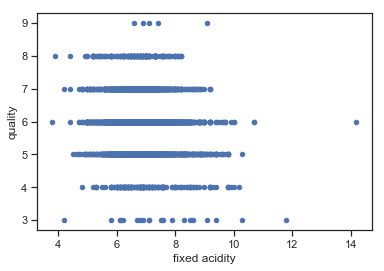

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


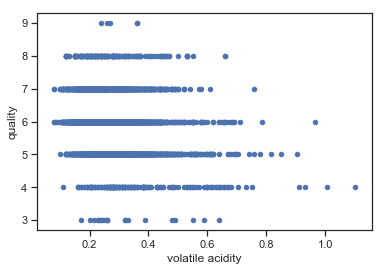

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


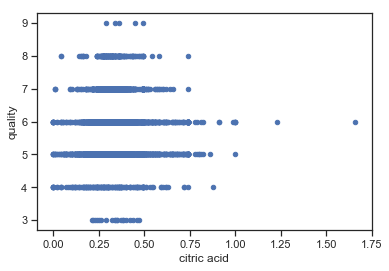

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


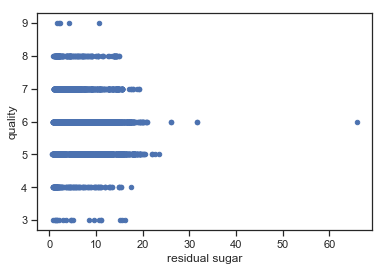

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


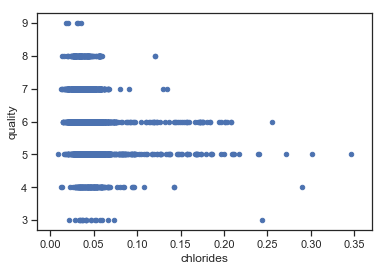

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


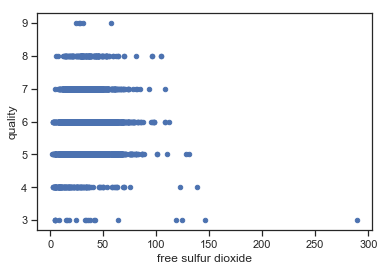

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


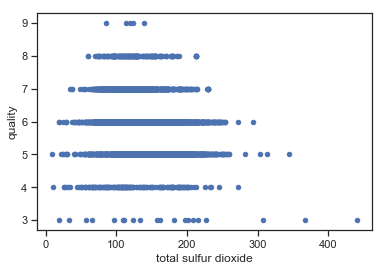

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


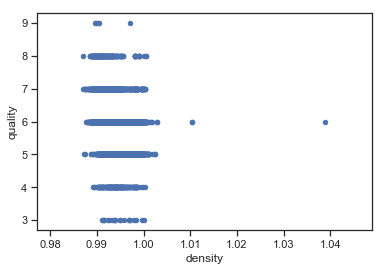

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


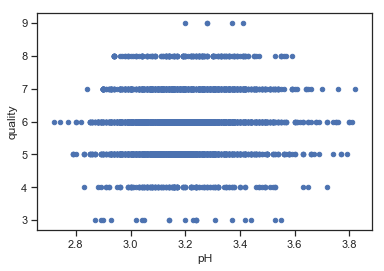

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


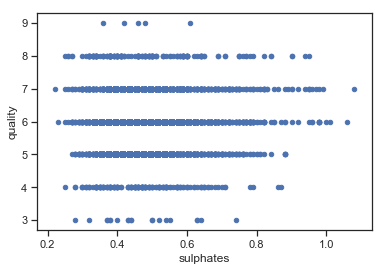

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


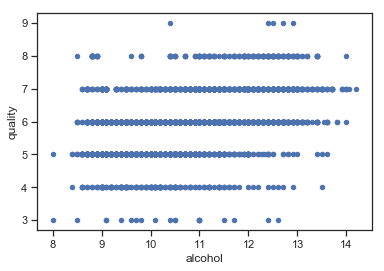

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


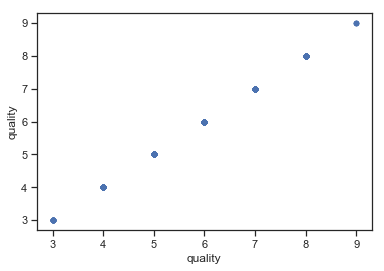

In [32]:
for columnname in WhiteWineData:
    WhiteWineData.plot(kind='scatter', x=columnname , y='quality')
    plt.show()

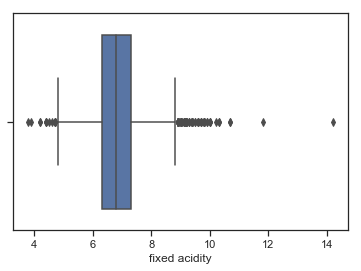

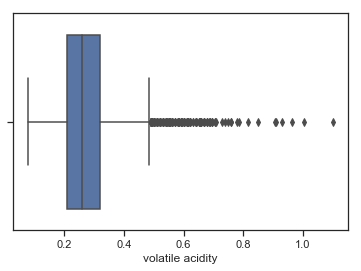

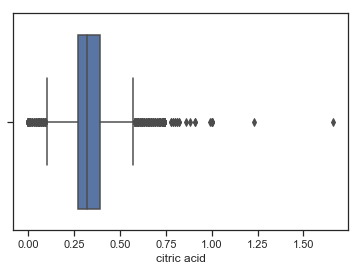

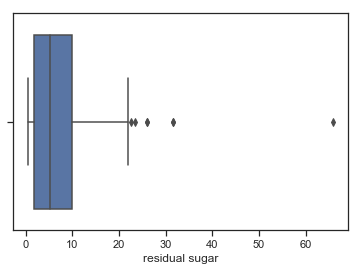

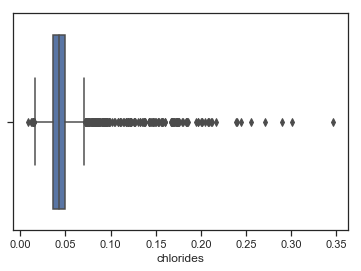

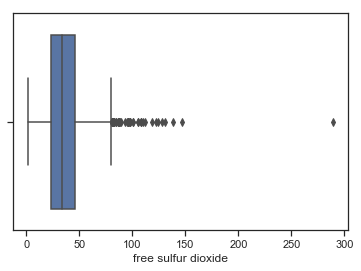

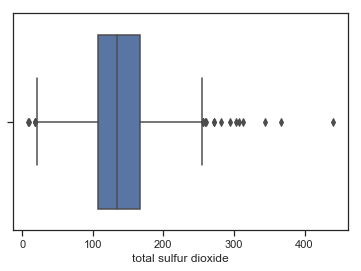

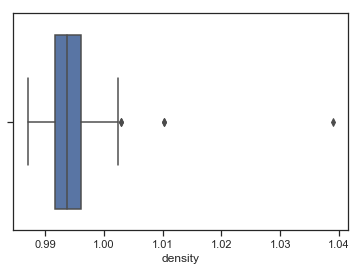

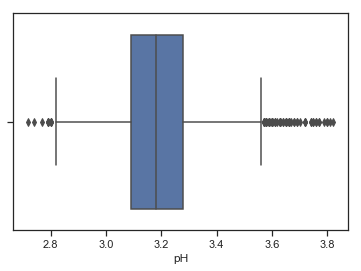

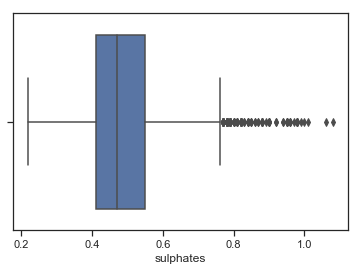

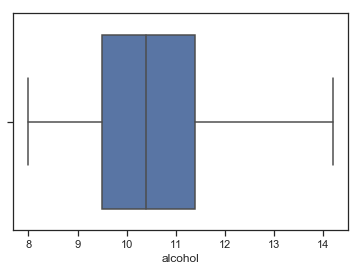

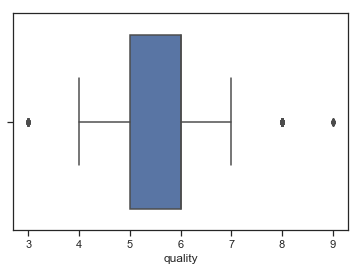

In [33]:
for columnname in WhiteWineData:
    sns.boxplot(x=WhiteWineData[columnname])
    plt.show()

#### Conclusion
1. Except alcohol , most of the features are having outliers.

#### Discover outliers with mathematical function

#### IQR score :
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data

In [34]:
Q1 = WhiteWineData.quantile(0.25)
Q3 = WhiteWineData.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
quality                  1.000000
dtype: float64


In [35]:
WhiteWineData_out = WhiteWineData[~((WhiteWineData < (Q1 - 1.5 * IQR)) |(WhiteWineData > (Q3 + 1.5 * IQR))).any(axis=1)]
WhiteWineData_out.shape

(3854, 12)

#### Conclusion
1. If we remove outliers, then we will be loosing almost 1000 sample data. So we will not remove it

## 4. Data cleaning / Transformation

As total sulfur dioxide and free sulfur dioxide is quite high compared to other features, we will do a feature scaling of both the feature

In [36]:
WhiteWineData['total sulfur dioxide_stand'] = preproc.StandardScaler().fit_transform(WhiteWineData[['total sulfur dioxide']])
WhiteWineData['total sulfur dioxide_MinMax'] = preproc.minmax_scale(WhiteWineData[['total sulfur dioxide']])

In [37]:
WhiteWineData['free sulfur dioxide_stand'] = preproc.StandardScaler().fit_transform(WhiteWineData[['free sulfur dioxide']])
WhiteWineData['free sulfur dioxide_MinMax'] = preproc.minmax_scale(WhiteWineData[['free sulfur dioxide']])

In [38]:
WhiteWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide_stand,total sulfur dioxide_MinMax,free sulfur dioxide_stand,free sulfur dioxide_MinMax
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000,4.898000e+03,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.057636e-16,0.300141,-4.671641e-17,0.116056
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,1.000102e+00,0.098603,1.000102e+00,0.059258
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,-3.044230e+00,0.000000,-1.958677e+00,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,-7.144739e-01,0.229698,-7.237750e-01,0.073171
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,-1.026189e-01,0.290023,-7.692173e-02,0.111498
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,6.739664e-01,0.366589,6.287364e-01,0.153310
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,7.098444e+00,1.000000,1.491831e+01,1.000000


#### Log transformation for feature which is not normally distributed

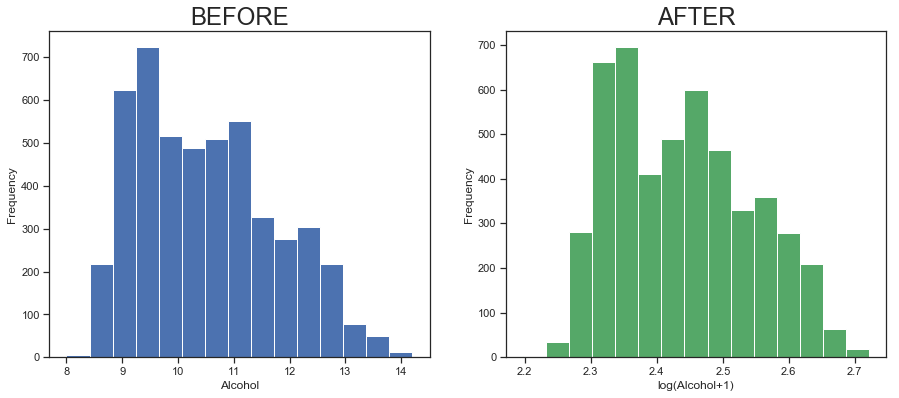

In [39]:
plt.subplot(1, 2, 1)
(WhiteWineData['alcohol']).plot.hist(bins=15, figsize=(15, 6), edgecolor = 'white')
plt.xlabel('Alcohol', fontsize=12)
plt.title('BEFORE', fontsize=24)

plt.subplot(1, 2, 2)
np.log(WhiteWineData['alcohol']+1).plot.hist(bins=15,figsize=(15,6), edgecolor='white', color='g')
plt.xlabel('log(Alcohol+1)', fontsize=12)
plt.title('AFTER', fontsize=24)

plt.show()

In [40]:
WhiteWineData['Alcohol_log'] = WhiteWineData['alcohol']+1

In [41]:
WhiteWineData.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total sulfur dioxide_stand,total sulfur dioxide_MinMax,free sulfur dioxide_stand,free sulfur dioxide_MinMax,Alcohol_log
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4.898000e+03,4898.000000,4.898000e+03,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909,1.057636e-16,0.300141,-4.671641e-17,0.116056,11.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639,1.000102e+00,0.098603,1.000102e+00,0.059258,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,-3.044230e+00,0.000000,-1.958677e+00,0.000000,9.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,-7.144739e-01,0.229698,-7.237750e-01,0.073171,10.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,-1.026189e-01,0.290023,-7.692173e-02,0.111498,11.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,6.739664e-01,0.366589,6.287364e-01,0.153310,12.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,7.098444e+00,1.000000,1.491831e+01,1.000000,15.200000


In [42]:
WhiteWineData.shape

(4898, 17)

#### Dropping features which already transformed

In [43]:
dropFeature = ['alcohol','total sulfur dioxide','total sulfur dioxide_stand', 'free sulfur dioxide', 'free sulfur dioxide_stand' ]
WhiteWineData.drop(dropFeature, axis=1,inplace=True)

In [44]:
WhiteWineData.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'density', 'pH', 'sulphates', 'quality',
       'total sulfur dioxide_MinMax', 'free sulfur dioxide_MinMax',
       'Alcohol_log'],
      dtype='object')

In [45]:
WhiteWineData.shape

(4898, 12)

## 5. Data preperation for Model selection for Training & Test

#### Splitting train and test Data

In [46]:
# With sklearn train_test_split
np.random.seed(42)
wine_train_set, wine_test_set = train_test_split(WhiteWineData, test_size=0.2, random_state=42)

print(len(wine_train_set), "train +", len(wine_test_set), "test")

wine_test_set.head()

3918 train + 980 test


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality,total sulfur dioxide_MinMax,free sulfur dioxide_MinMax,Alcohol_log
4656,6.0,0.29,0.41,10.8,0.048,0.99370,3.09,0.59,7,0.324826,0.184669,11.966667
3659,5.4,0.53,0.16,2.7,0.036,0.98856,3.20,0.53,8,0.276102,0.111498,14.200000
907,7.1,0.25,0.39,2.1,0.036,0.99080,3.28,0.43,8,0.266821,0.097561,13.200000
4352,7.3,0.28,0.35,1.6,0.054,0.99178,3.18,0.47,5,0.322506,0.101045,11.700000
3271,6.5,0.32,0.34,5.7,0.044,0.99184,3.28,0.60,7,0.190255,0.087108,13.000000


In [47]:
wine_test_set.quality.value_counts()

6    432
5    291
7    192
8     35
4     25
3      5
Name: quality, dtype: int64

In [48]:
wine_train_set.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,quality,total sulfur dioxide_MinMax,free sulfur dioxide_MinMax,Alcohol_log
4665,7.3,0.17,0.36,8.20,0.028,0.99272,3.14,0.41,6,0.236659,0.146341,13.4
1943,6.3,0.25,0.44,11.60,0.041,0.99680,3.18,0.52,5,0.431555,0.160279,10.5
3399,5.6,0.32,0.33,7.40,0.037,0.99268,3.25,0.49,6,0.199536,0.080139,12.1
843,6.9,0.19,0.35,1.70,0.036,0.99315,3.21,0.54,7,0.213457,0.108014,11.8
2580,7.7,0.30,0.26,18.95,0.053,0.99976,3.20,0.50,5,0.382831,0.118467,11.4


In [49]:
wine_train_set.quality.value_counts()

6    1766
5    1166
7     688
8     140
4     138
3      15
9       5
Name: quality, dtype: int64

#### Removing Target Data from both Training and test set

In [50]:
wine_train_set_Y=wine_train_set.quality

In [51]:
wine_train_set_Y.shape

(3918,)

In [52]:
wine_train_set_Y.head()

4665    6
1943    5
3399    6
843     7
2580    5
Name: quality, dtype: int64

In [53]:
wine_train_set_X=wine_train_set.drop('quality',axis=1)

In [54]:
wine_train_set_X.shape

(3918, 11)

In [55]:
wine_train_set_X.loc[4665]## Checking any specific sample still matched with X and Y

fixed acidity                   7.300000
volatile acidity                0.170000
citric acid                     0.360000
residual sugar                  8.200000
chlorides                       0.028000
density                         0.992720
pH                              3.140000
sulphates                       0.410000
total sulfur dioxide_MinMax     0.236659
free sulfur dioxide_MinMax      0.146341
Alcohol_log                    13.400000
Name: 4665, dtype: float64

In [56]:
wine_train_set.loc[4665]

fixed acidity                   7.300000
volatile acidity                0.170000
citric acid                     0.360000
residual sugar                  8.200000
chlorides                       0.028000
density                         0.992720
pH                              3.140000
sulphates                       0.410000
quality                         6.000000
total sulfur dioxide_MinMax     0.236659
free sulfur dioxide_MinMax      0.146341
Alcohol_log                    13.400000
Name: 4665, dtype: float64

In [57]:
wine_test_set_Y=wine_test_set.quality
wine_test_set_X=wine_test_set.drop('quality',axis=1)

In [58]:
wine_test_set_Y.shape

(980,)

In [59]:
wine_test_set_X.shape

(980, 11)

### Model Selection

#### Using Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(wine_train_set_X, wine_train_set_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [62]:
[lin_reg.coef_]

[array([ 4.59072370e-02, -1.91488432e+00, -6.13034698e-02,  7.12395507e-02,
        -2.64751329e-02, -1.24264125e+02,  6.00699854e-01,  6.49072780e-01,
        -1.04368358e-01,  1.46928322e+00,  2.29008684e-01])]

In [63]:
format(lin_reg.intercept_, '.3f')

'124.173'

In [64]:
some_data = wine_test_set_X.iloc[:5]
some_labels = wine_test_set_Y.iloc[:5]

In [65]:
some_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,total sulfur dioxide_MinMax,free sulfur dioxide_MinMax,Alcohol_log
4656,6.0,0.29,0.41,10.8,0.048,0.99370,3.09,0.59,0.324826,0.184669,11.966667
3659,5.4,0.53,0.16,2.7,0.036,0.98856,3.20,0.53,0.276102,0.111498,14.200000
907,7.1,0.25,0.39,2.1,0.036,0.99080,3.28,0.43,0.266821,0.097561,13.200000
4352,7.3,0.28,0.35,1.6,0.054,0.99178,3.18,0.47,0.322506,0.101045,11.700000
3271,6.5,0.32,0.34,5.7,0.044,0.99184,3.28,0.60,0.190255,0.087108,13.000000


In [66]:
some_labels

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

In [67]:
predict = lin_reg.predict(some_data)
full_predict = lin_reg.predict(wine_test_set_X)
print("Predictions:", predict)

Predictions: [6.3718293  6.39819558 6.41184115 5.8298407  6.43750933]


In [68]:
print("Actuals:", some_labels)

Actuals: 4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64


#### Calculating the Loss

In [69]:
# Store results in variable
r2 = format(r2_score(wine_test_set_Y, full_predict),'.3f')
rmse = format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict)),'.3f')
mae = format(mean_absolute_error(wine_test_set_Y, full_predict),'.3f')

# Print out result
print("R Squared Score: ", format(r2_score(wine_test_set_Y, full_predict),'.3f'))
print("Root Mean Squared Error: ", format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict)),'.3f'))
print("Mean Absolute Error: ", format(mean_absolute_error(wine_test_set_Y, full_predict),'.3f'))

R Squared Score:  0.265
Root Mean Squared Error:  0.754
Mean Absolute Error:  0.586


### Using StatModel API

In [70]:
# Apply OLS to our X and Y
lm = sm.OLS(wine_train_set_Y, wine_train_set_X).fit()

# Print Summary of Outputs
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.168e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:40:07   Log-Likelihood:                -4452.2
No. Observations:                3918   AIC:                             8926.
Df Residuals:                    3907   BIC:                             8995.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
fixed acidity                  -0.0519      0.017     -3.066      0.002      -0.085      -0.019
volatile acidity               -2.0087      0.126    -15.974      0.000      -2.255      -1.762
citric acid                    -0.1046      0.109     -0.962      0.336      -0.318       0.108
residual sugar                  0.0241      0.003      8.401      0.000       0.018       0.030
chlorides                      -0.6154      0.605     -1.016      0.310      -1.802       0.572
density                         1.5821      0.402      3.934      0.000       0.794       2.371
pH                              0.1643      0.094      1.745      0.081      -0.020       0.349
sulphates                       0.4669      0.109      4.280      0.000       0.253       0.681
total sulfur dioxide_MinMax    -0.3092      0.181     -1.704      0.089      -0.665       0.047
free sulfur dioxide_MinMax      1.7242      0.274      6.294      0.000       1.187       2.261
Alcohol_log                     0.3705      0.012     29.799      0.000       0.346       0.395
==============================================================================
Omnibus:                       87.428   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              177.641
Skew:                           0.111   Prob(JB):                     2.67e-39
Kurtosis:                       4.019   Cond. No.                         792.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using Random Forests

In [71]:
# Let's train one more model using Random Forests
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(wine_train_set_X, wine_train_set_Y)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [72]:
full_predict_forest = forest_reg.predict(wine_test_set_X)
print("Predictions in Random Forest:", full_predict_forest)

Predictions in Random Forest: [6.8 7.4 6.8 5.6 6.7 6.2 5.2 5.2 6.1 5.  6.6 5.1 6.7 5.3 6.9 5.2 6.9 5.7
 6.8 5.7 5.2 6.1 5.  6.3 6.3 5.1 5.  6.1 6.4 5.6 5.  5.  5.7 5.7 5.1 6.7
 5.7 5.4 5.3 5.7 5.3 6.1 6.1 5.4 4.8 6.  5.5 5.3 5.  5.  5.  5.2 5.3 6.4
 6.6 5.2 6.  6.3 5.7 6.9 6.1 5.5 5.9 7.  5.4 6.8 6.3 5.7 6.1 5.8 5.2 5.9
 4.8 4.4 5.9 6.4 5.6 5.9 7.6 7.  5.8 5.2 6.  6.5 5.3 6.6 5.1 6.7 5.2 6.2
 6.8 5.5 5.8 6.5 6.7 6.8 6.5 5.8 5.4 6.1 5.6 6.8 6.8 5.4 6.  6.4 6.9 6.5
 5.7 6.2 5.8 6.6 6.2 5.5 5.3 6.7 7.3 6.4 5.5 8.  5.7 6.5 6.2 5.4 6.4 6.5
 7.1 5.3 6.2 5.3 6.5 5.8 5.7 6.9 5.1 6.5 6.3 5.7 6.7 5.4 7.  6.  6.2 5.4
 6.5 5.4 5.  5.5 5.1 5.2 5.9 5.9 5.6 5.5 7.1 4.7 6.2 6.  6.4 5.4 5.7 5.6
 5.6 5.9 6.8 6.  5.1 6.1 5.5 6.1 5.4 5.9 6.4 5.3 7.1 6.2 5.6 6.6 5.9 5.4
 6.4 5.7 6.1 6.  5.4 6.6 6.4 5.5 6.1 5.4 5.8 5.7 6.6 6.4 5.4 5.3 6.9 6.8
 5.3 5.6 6.8 5.  6.1 6.  5.7 5.6 7.  6.6 5.9 6.6 5.8 6.2 6.3 6.7 5.3 5.7
 6.1 5.5 5.5 6.4 5.2 5.2 5.7 6.  6.2 5.2 6.2 6.7 6.7 5.5 6.  5.1 6.3 5.5
 5.4 7.  6.  5.6 5.6 

#### Calculating the Loss

In [73]:
# Calculate RMSE in Random Forest model
r2_forest = format(r2_score(wine_test_set_Y, full_predict_forest),'.3f')
rmse_forest = format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_forest)),'.3f')
mae_forest = format(mean_absolute_error(wine_test_set_Y, full_predict_forest),'.3f')

# Print out result
print("R Squared Score - Random Forest: ", format(r2_score(wine_test_set_Y, full_predict_forest),'.3f'))
print("Root Mean Squared Error - Random Forest: ", format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_forest)),'.3f'))
print("Mean Absolute Error - Random Forest: ", format(mean_absolute_error(wine_test_set_Y, full_predict_forest),'.3f'))

R Squared Score - Random Forest:  0.509
Root Mean Squared Error - Random Forest:  0.617
Mean Absolute Error - Random Forest:  0.442


In [74]:
full_predict_forest_somedata = forest_reg.predict(some_data)
print("Predictions in Random Forest for some data:", full_predict_forest_somedata)

Predictions in Random Forest for some data: [6.8 7.4 6.8 5.6 6.7]


In [75]:
some_labels

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

### Using Decision Tree

In [76]:
# Train a model using Decision Tree

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(wine_train_set_X, wine_train_set_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [77]:
full_predict_tree = tree_reg.predict(wine_test_set_X)
print("Predictions in Random Forest:", full_predict_tree)

Predictions in Random Forest: [7. 8. 7. 5. 6. 6. 5. 4. 6. 5. 7. 5. 8. 5. 7. 5. 8. 5. 7. 5. 5. 6. 5. 6.
 7. 5. 5. 6. 7. 7. 5. 5. 6. 6. 6. 7. 6. 6. 5. 5. 5. 6. 6. 5. 5. 6. 6. 4.
 5. 5. 4. 7. 5. 7. 7. 5. 6. 7. 5. 7. 6. 7. 6. 7. 6. 7. 7. 6. 6. 5. 5. 6.
 5. 4. 6. 6. 6. 7. 6. 7. 6. 5. 6. 6. 4. 7. 5. 7. 5. 5. 7. 7. 5. 6. 7. 7.
 6. 7. 6. 6. 5. 5. 7. 6. 6. 6. 7. 7. 5. 6. 6. 7. 6. 5. 5. 7. 6. 7. 5. 8.
 6. 6. 7. 6. 7. 7. 8. 6. 7. 5. 6. 6. 6. 5. 6. 7. 6. 6. 6. 6. 6. 6. 6. 5.
 7. 5. 5. 6. 5. 5. 7. 6. 5. 5. 7. 5. 6. 6. 7. 5. 6. 5. 5. 6. 7. 6. 5. 7.
 5. 6. 5. 6. 6. 5. 7. 7. 6. 6. 5. 4. 7. 6. 6. 6. 5. 6. 6. 6. 6. 6. 6. 6.
 7. 6. 6. 6. 7. 7. 5. 5. 7. 5. 6. 5. 7. 6. 6. 7. 6. 6. 6. 6. 6. 8. 6. 5.
 6. 5. 7. 6. 5. 5. 6. 6. 6. 5. 5. 5. 8. 6. 5. 5. 7. 5. 5. 7. 6. 5. 5. 7.
 6. 4. 7. 6. 6. 5. 6. 4. 5. 6. 6. 4. 6. 6. 7. 5. 5. 5. 8. 6. 7. 5. 5. 5.
 5. 6. 6. 6. 7. 5. 5. 5. 7. 7. 6. 6. 6. 7. 6. 6. 6. 6. 6. 4. 6. 7. 8. 8.
 6. 5. 6. 6. 6. 6. 8. 5. 7. 6. 6. 5. 4. 6. 7. 4. 7. 5. 6. 6. 6. 4. 6. 6.
 5. 6. 7. 9. 6. 6. 5.

#### Calculating the Loss

In [78]:
# Calculate RMSE in Decision Tree model
r2_tree = format(r2_score(wine_test_set_Y, full_predict_tree),'.3f')
rmse_tree = format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_tree)),'.3f')
mae_tree = format(mean_absolute_error(wine_test_set_Y, full_predict_tree),'.3f')

# Print out result
print("R Squared Score - Decision Tree: ", format(r2_score(wine_test_set_Y, full_predict_tree),'.3f'))
print("Root Mean Squared Error - Decision Tree: ", format(np.sqrt(mean_squared_error(wine_test_set_Y, full_predict_tree)),'.3f'))
print("Mean Absolute Error - Decision Tree: ", format(mean_absolute_error(wine_test_set_Y, full_predict_tree),'.3f'))

R Squared Score - Decision Tree:  0.146
Root Mean Squared Error - Decision Tree:  0.813
Mean Absolute Error - Decision Tree:  0.484


In [79]:
full_predict_tree_somedata = tree_reg.predict(some_data)
print("Predictions in Decision Tree for some data:", full_predict_tree_somedata)

Predictions in Decision Tree for some data: [7. 8. 7. 5. 6.]


In [80]:
some_labels

4656    7
3659    8
907     8
4352    5
3271    7
Name: quality, dtype: int64

## Conclusion:
Out of Linear regression , Stat model API, Random Forest and Decission Tree Regressor, we are getting better result in Desission Tree Regressor. 

    